In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from pychangcooper import  GenericCoolingAcceleration


# Generic Cooling and Acceleration

For a generic heating/cooling and acceleration problem, we rewrite the Fokker-Planck equation as:

$$\frac{\partial N\left(\gamma, t\right)}{\partial t}  = \frac{\partial }{\partial \gamma} \left[ \left(C \left(\gamma \right) - A\left(\gamma \right) \right)N\left(\gamma, t\right) + D \left(\gamma \right) \frac{\partial N\left(\gamma, t\right)}{\partial \gamma}\right]$$

where:

$$A\left(\gamma \right) = \frac{2}{\gamma}D\left(\gamma \right) \text{.}$$

Here we specify $C \left( \gamma \right) = C_{0} \gamma^{a}$ and $D\left( \gamma \right) = \frac{1}{2 t_{\text{acc}}} \gamma^{b}$ where the acceleration time is $t_{\text{acc}}$. The steady-state solution for this problem (given no injection or escape) is

$$N(\gamma) \propto \gamma^2 \exp \left[ \frac{2 t_{\text{acc}}C_0 \left( \gamma^{b+1 -a} \right)} {a-1-b} \right] $$.


If we let $a=b=2$, an electron of energy $\gamma$ will cool in a characteristic time $t_{\text{cool}}(\gamma) = 1 / \left(C_0 \gamma \right)$, thus when the cooling time is equal to the acceleration time, and electron will have an equilibrium energy $\gamma_{\text{e}} = \frac{1}{t_{\text{acc}}C_0}$.

## Solving the equation

### Setting an initial distribution
We will start with an initial flat electron distribution at low energy and let it evolve for $50\cdot t_{\text{acc}}$.


In [2]:
n_grid_points = 300

init_distribution = np.zeros(n_grid_points)


for i in range(30):
    
    init_distribution[i+1] = 1.



### Create the solver
We set $C_0 = 1$ and $t_{\text{acc}} = 10^{-4}$ and thus $\gamma_{\text{e}} = 10^4$.



In [7]:
generic_ca = GenericCoolingAcceleration(n_grid_points=n_grid_points,
                                        C0 = 1.,
                                        t_acc= 1E-4,
                                        cooling_index=2.,
                                        acceleration_index=2.,
                                        initial_distribution = init_distribution,
                                        store_progress = True
                                       )

Run the solver:

In [8]:
for i in range(45):
    
    generic_ca.solve_time_step()

### Plot the history of the solution

<IPython.core.display.Javascript object>


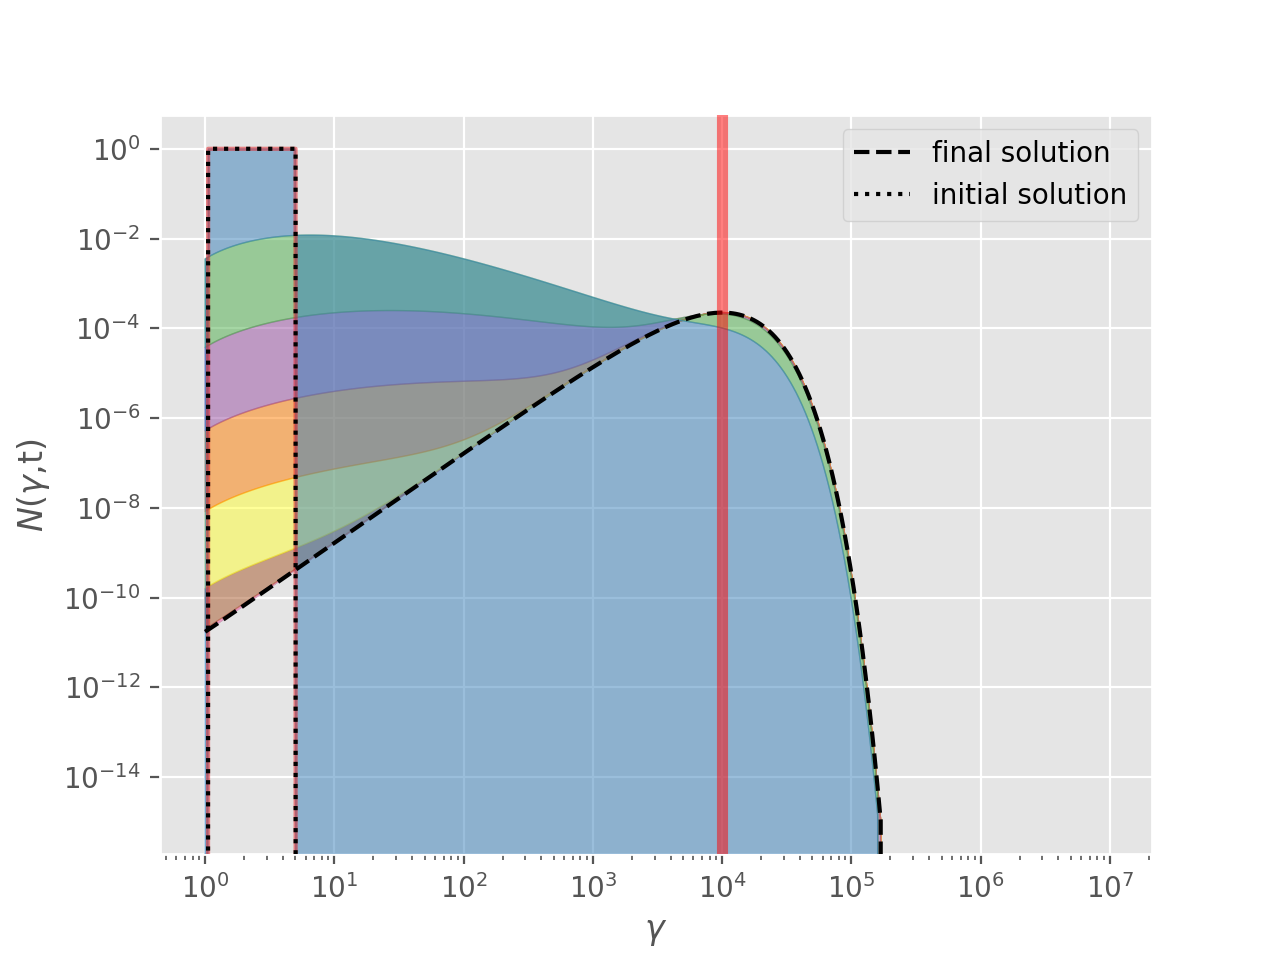

In [13]:
fig = generic_ca.plot_evolution(skip=5,
                                alpha=.5,
                                cmap='Set1',
                                show_initial=True,
                                show_final=True,
                                show_legend=True
                               )

ax = fig.get_axes()[0]

# plot the equilbrium solution
ax.axvline(1E4,color='red',lw = 4, zorder=100, alpha=.5)
